# Purpose

Is to use changepoint detection to detect when the gaze has changed from one product to another during calibration. 

What we'd ideally like to get out of this is the frame intervals at which each product ($1, 2, 3, 4, etc$) is being looked at.

So we'd get the intervals for each product like so:

$$
[a_1, b_1], [a_2, b_2], [a_3, b_3], [a_4, b_4], etc
$$

In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

DATA_DIR = 'notebook_data'
VIDEOS_DIR = 'videos'

ORIGINAL_VIDEO_FILENAME = 'Camera 1 - Vendlytics Prototype.mp4'
FACE_DETECTION_VIDEO_FILENAME = 'output-_local.avi'
GAZE_DETECTION_VIDEO_FILENAME = 'output-_local_1.avi'

FACE_BBOXES_FILENAME = 'frame_to_bbox.txt'
GAZE_ANGLES_FILENAME = 'frame_to_gaze.txt'

ORIGINAL_VIDEO_PATH = os.path.join(DATA_DIR, VIDEOS_DIR, ORIGINAL_VIDEO_FILENAME)
FACE_DETECTION_VIDEO_PATH = os.path.join(DATA_DIR, VIDEOS_DIR, FACE_DETECTION_VIDEO_FILENAME)
GAZE_DETECTION_VIDEO_PATH = os.path.join(DATA_DIR, VIDEOS_DIR, GAZE_DETECTION_VIDEO_FILENAME)
FACE_BBOXES_PATH = os.path.join(DATA_DIR, FACE_BBOXES_FILENAME)
GAZE_ANGLES_PATH = os.path.join(DATA_DIR, GAZE_ANGLES_FILENAME)

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


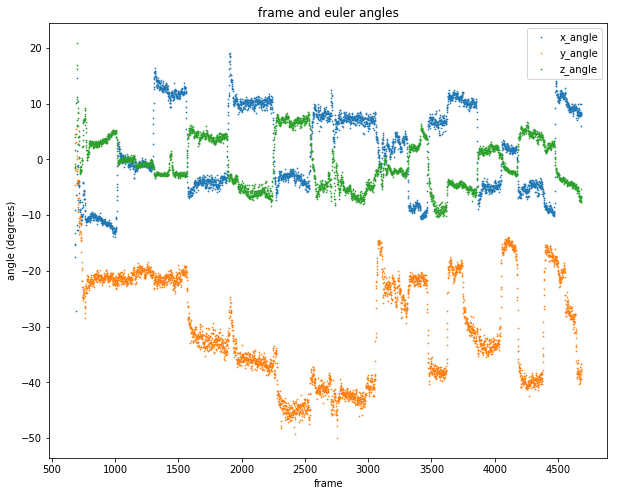

In [2]:
bbox_df = pd.read_csv(FACE_BBOXES_PATH, delimiter=' ', header=None)
bbox_df.columns = ['frame_number', 'x_min', 'y_min', 'x_max', 'y_max', 'confidence_score']

gaze_df = pd.read_csv(GAZE_ANGLES_PATH, delimiter=' ', header=None)
gaze_df.columns = ['frame_number', 'x_angle', 'y_angle', 'z_angle']

MARKER_SIZE = 0.5
FRAME_LIMIT = 4000

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)

x = gaze_df.T.loc['frame_number'][:FRAME_LIMIT]
ax1.scatter(x, gaze_df.T.loc['x_angle'][:FRAME_LIMIT], s=MARKER_SIZE) # x angle
ax1.scatter(x, gaze_df.T.loc['y_angle'][:FRAME_LIMIT], s=MARKER_SIZE) # y angle
ax1.scatter(x, gaze_df.T.loc['z_angle'][:FRAME_LIMIT], s=MARKER_SIZE) # z angle

plt.title("frame and euler angles")
plt.xlabel("frame")
plt.ylabel("angle (degrees)")

plt.legend(["x_angle", "y_angle", "z_angle"])
fig.show()

In [3]:
gaze_df.head()

,frame_number,x_angle,y_angle,z_angle
0,682,-9.101837,-4.555634,-0.912392
1,683,-13.126450,-1.246826,-1.620468
2,684,-15.179825,2.938110,1.712021
3,685,-17.545975,4.570633,-1.424942
4,686,-15.356705,-1.959663,3.927353


### Data

In [29]:
data = gaze_df[['x_angle', 'y_angle', 'z_angle']].values[:3592]

In [30]:
FRAME_START = 682

# times (s) when ashton was looking at each of 7 products
TIME_MARKERS_SEC = [27, 34, 44, 53, 66, 77, 87, 97]

# we know video is 30 fps, so 30 * TIME_MARKERS_SEC[i] 
# (where i is single product) gives us frame to use angle from
TIME_MARKERS_FRAMES = [(30 * i - FRAME_START) for i in TIME_MARKERS_SEC]

print(TIME_MARKERS_FRAMES)

[128, 338, 638, 908, 1298, 1628, 1928, 2228]


## Model

ValueError: too many values to unpack (expected 1)

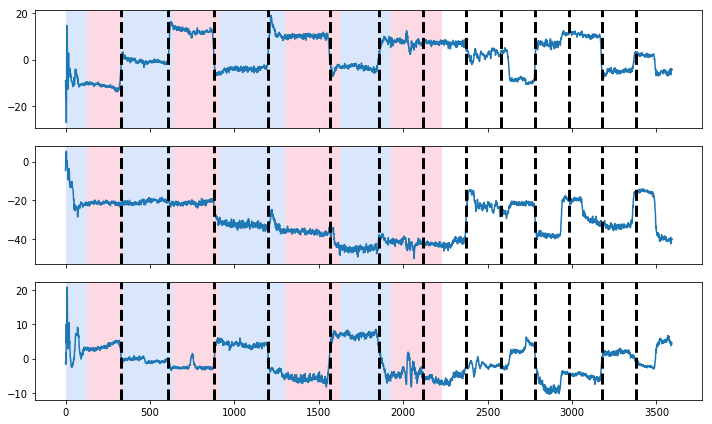

In [34]:
import ruptures as rpt

model = "l1"
algo = rpt.Pelt(model=model, min_size=200, jump=10).fit(data)
my_bkps = algo.predict(pen=3)

fig, (ax,) = rpt.display(data, TIME_MARKERS_FRAMES, my_bkps, figsize=(10, 6))
plt.show()

In [36]:
TIME_MARKERS_FRAMES

[128, 338, 638, 908, 1298, 1628, 1928, 2228]

In [35]:
my_bkps[:8]

[330, 610, 880, 1200, 1570, 1860, 2120, 2370]